# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 4 - Asunciones Regresión Lineal**
---

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.



El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 

Recordamos que estas asunciones son:

- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables
  
Cada asunción la deberéis testar de forma visual y analítica.

In [1]:

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import researchpy as rp
from itertools import combinations
from scipy.stats import levene

import statsmodels.api as sm
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

pd.options.display.max_columns = None


In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,country,region,restaurant_price_index,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8
1,Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        66 non-null     object 
 1   region                                         66 non-null     object 
 2   restaurant_price_index                         66 non-null     float64
 3   population_in_thousands_(2017)                 66 non-null     float64
 4   employment:_agriculture_(%_of_employed)        66 non-null     float64
 5   employment:_industry_(%_of_employed)           66 non-null     float64
 6   employment:_services_(%_of_employed)           66 non-null     float64
 7   education:_government_expenditure_(%_of_gdp)   66 non-null     float64
 8   quality_of_life_index                          66 non-null     float64
 9   purchasing_power_index                         66 non-nu

1. Normalidad: se calcula sobre la variable respuesta 
   - Analíticas: Shapiro o Kolmogorov-Smirnov
   - Gráficas: histplot, displot, qqplot

In [4]:
# usamos Shapiro porque la muestra es muy pequeña, tan solo 66 registros.
stats.shapiro(df['restaurant_price_index'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270884139463305)

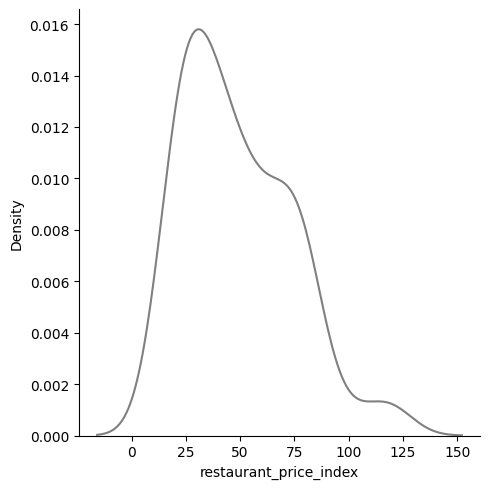

In [19]:
sns.displot(df['restaurant_price_index'], kind='kde', color = "grey");

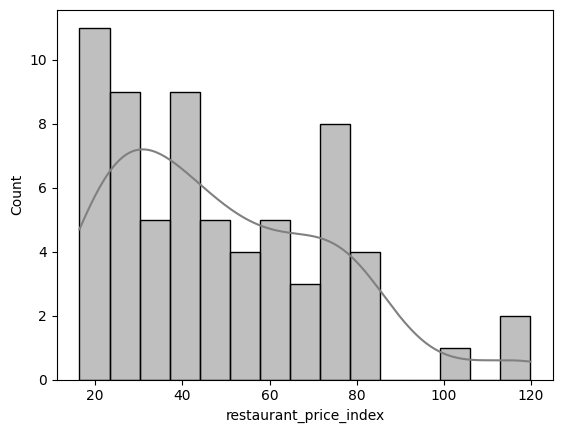

In [17]:
sns.histplot(df['restaurant_price_index'], kde = True, color = "grey", bins=15);

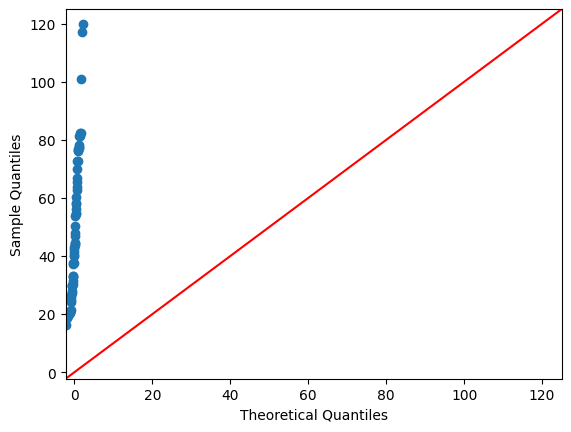

In [7]:
sm.qqplot(df['restaurant_price_index'], line ='45');

Como vemos no es normal. En el histplot y distplot se ve que no se ajusta a la campana de Gauss. En el qqplot se ve que los datos no se ajustan a la línea. En el test de Saphiro nos dale p-value < 0,05. Todo ello indica que los datos no se ajustan a una distribución normal. No podríamos hacer una regresión lineal sin normalizarla.

2. Independencia de las variables: se calcula sobre las variables predictoras
   - Analíticas: Chi_square

En un proyecto real no analizaríamos la independencia ya que los datos de la variable respuesta no se ajusta a una distribución normal pero siendo un ejercicio lo realizamos para aplicar las herramientas aprendidas.

In [8]:
# creamos las combinaciones de predictoras
predictoras = df.select_dtypes(include=np.number).drop(columns='restaurant_price_index')
combinaciones = list(combinations(predictoras, 2))
print(combinaciones)

[('population_in_thousands_(2017)', 'employment:_agriculture_(%_of_employed)'), ('population_in_thousands_(2017)', 'employment:_industry_(%_of_employed)'), ('population_in_thousands_(2017)', 'employment:_services_(%_of_employed)'), ('population_in_thousands_(2017)', 'education:_government_expenditure_(%_of_gdp)'), ('population_in_thousands_(2017)', 'quality_of_life_index'), ('population_in_thousands_(2017)', 'purchasing_power_index'), ('population_in_thousands_(2017)', 'safety_index'), ('population_in_thousands_(2017)', 'cost_of_living'), ('population_in_thousands_(2017)', 'consumer_price_index_(2010_=_100)'), ('population_in_thousands_(2017)', 'human_capital_index_(hci)_(scale_0-1)'), ('population_in_thousands_(2017)', 'inflation,_consumer_prices_(annual_%)'), ('population_in_thousands_(2017)', 'urban_population_(%_of_total_population)_y'), ('population_in_thousands_(2017)', 'population_age_distribution_(0-14_years,_%)'), ('population_in_thousands_(2017)', 'population_age_distribution

In [10]:
# ahora evaluaremos la independencia entre las combinaciones de nuestras columnas: 
cramers_v = {}
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df[i[0]], df[i[1]],
                                                    test= 'chi-square',
                                                    expected_freqs= True,
                                                    prop= 'cell')
   
    print(f'INDEPENDENCIA ENTRE {i[0], i[1]} \n', test_results)
    print('-------------------------------------------------------')
    cramers_v[f'{i[0]}_{i[1]}'] = test_results.iloc[2,1]


INDEPENDENCIA ENTRE ('population_in_thousands_(2017)', 'employment:_agriculture_(%_of_employed)') 
                    Chi-square test    results
0  Pearson Chi-square ( 3640.0) =   3696.0000
1                       p-value =      0.2544
2                    Cramer's V =      1.0000
-------------------------------------------------------
INDEPENDENCIA ENTRE ('population_in_thousands_(2017)', 'employment:_industry_(%_of_employed)') 
                    Chi-square test    results
0  Pearson Chi-square ( 3510.0) =   3564.0000
1                       p-value =      0.2581
2                    Cramer's V =      1.0000
-------------------------------------------------------
INDEPENDENCIA ENTRE ('population_in_thousands_(2017)', 'employment:_services_(%_of_employed)') 
                    Chi-square test    results
0  Pearson Chi-square ( 3770.0) =   3828.0000
1                       p-value =      0.2507
2                    Cramer's V =      1.0000
------------------------------------------

In [20]:
# sacamos los resultados guardados en el diccionario
cramers_v

{'population_in_thousands_(2017)_employment:_agriculture_(%_of_employed)': 1.0,
 'population_in_thousands_(2017)_employment:_industry_(%_of_employed)': 1.0,
 'population_in_thousands_(2017)_employment:_services_(%_of_employed)': 1.0,
 'population_in_thousands_(2017)_education:_government_expenditure_(%_of_gdp)': 1.0,
 'population_in_thousands_(2017)_quality_of_life_index': 1.0,
 'population_in_thousands_(2017)_purchasing_power_index': 1.0,
 'population_in_thousands_(2017)_safety_index': 1.0,
 'population_in_thousands_(2017)_cost_of_living': 1.0,
 'population_in_thousands_(2017)_consumer_price_index_(2010_=_100)': 1.0,
 'population_in_thousands_(2017)_human_capital_index_(hci)_(scale_0-1)': 1.0,
 'population_in_thousands_(2017)_inflation,_consumer_prices_(annual_%)': 1.0,
 'population_in_thousands_(2017)_urban_population_(%_of_total_population)_y': 1.0,
 'population_in_thousands_(2017)_population_age_distribution_(0-14_years,_%)': 1.0,
 'population_in_thousands_(2017)_population_age_dis

Como vemos todas las variables predictoras son dependientes así que no podríamos hacer una regresión lineal

3. Homogeneidad u homocedasticidad de varianzas: se calcula sobre las variables predictoras:
   - Analíticas: Levene (datos no normales)
                 Bartlett (datos normales)
   - Gráficas: violinplot, boxplot

Para realizar el ejercicio, dado que no tenemos una distribución normal utilizamos el test de Levene, que es más recomendable cuando no tenemos la seguridad de que los datos sean normales. No obstante, En un proyecto real no analizaríamos la homocedasticidad una vez obtenidos los resultados de normalidad e independencia.

In [22]:
# analiticamente analizamos las columnas numéricas
result_levene_num = {}

for col in predictoras:
      statistic, p_val = levene(df[col], df.restaurant_price_index, center='median')
      result_levene_num[col] = p_val 
result_levene_num  

{'population_in_thousands_(2017)': 0.006865476366096122,
 'employment:_agriculture_(%_of_employed)': 7.792524851174642e-08,
 'employment:_industry_(%_of_employed)': 5.123716977352301e-13,
 'employment:_services_(%_of_employed)': 5.5857269550645916e-06,
 'education:_government_expenditure_(%_of_gdp)': 0.0006151103029989481,
 'quality_of_life_index': 0.001069993595461225,
 'purchasing_power_index': 0.04278871347359312,
 'safety_index': 4.063776528729857e-05,
 'cost_of_living': 0.22408338907573289,
 'consumer_price_index_(2010_=_100)': 0.7268549022984792,
 'human_capital_index_(hci)_(scale_0-1)': 1.9612778841920467e-19,
 'inflation,_consumer_prices_(annual_%)': 3.0770697327909217e-16,
 'urban_population_(%_of_total_population)_y': 0.00880379121076484,
 'population_age_distribution_(0-14_years,_%)': 5.072143432461885e-13,
 'population_age_distribution_(60+_years,_%)': 1.1223998480548118e-10,
 'international_migrant_stock_(%_of_total_pop.)': 9.28418619222132e-05}

Tan solo tenemos dos columnas numéricas con valores homocedásticos (p-val > 0,05): 'cost_of_living': 0.22408338907573289 y 'consumer_price_index_(2010_=_100)': 0.7268549022984792.
Todas las demás tienen valores heterocedásticos.

In [27]:
print(f'Tenemos {df.shape[0]} filas y {len(df.country.unique())} elementos únicos en la columna "country", por lo que no tiene sentido considerarla como variable categórica')

Tenemos 66 filas y 66 elementos únicos en la columna "country", por lo que no tiene sentido considerarla como variable categórica


In [23]:
# analiticamente analizamos la única columna categórica que tenemos una vez descartada la de 'country', osea la columna 'region'
dicc = {}
for cat in df.region.unique():
    df_cat = df[df['region'] == cat]['restaurant_price_index']
    dicc[cat] = df_cat
dicc.keys()

dict_keys(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope', 'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia', 'NorthernEurope', 'NorthernAfrica', 'SouthernAsia', 'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'])

In [25]:
levene_test_cat = stats.levene(dicc['SouthAmerica'], dicc['Oceania'], dicc['WesternEurope'], dicc['EasternEurope'], dicc['SouthernEurope'], dicc['NorthernAmerica'], 
                            dicc['EasternAsia'], dicc['WesternAsia'], dicc['NorthernEurope'], dicc['NorthernAfrica'], dicc['SouthernAsia'], dicc['South-easternAsia'], 
                            dicc['CentralAmerica'], dicc['SouthernAfrica'], center='median')
levene_test_cat

LeveneResult(statistic=1.0255039536430455, pvalue=0.4422592622902402)

Según el test de Levene la columna categórica 'region' es homocedástica (p-value > 0,05). No obstante, no deberíamos haber realizado este test porque no cumplimos las asunciones de normalidad e independencia

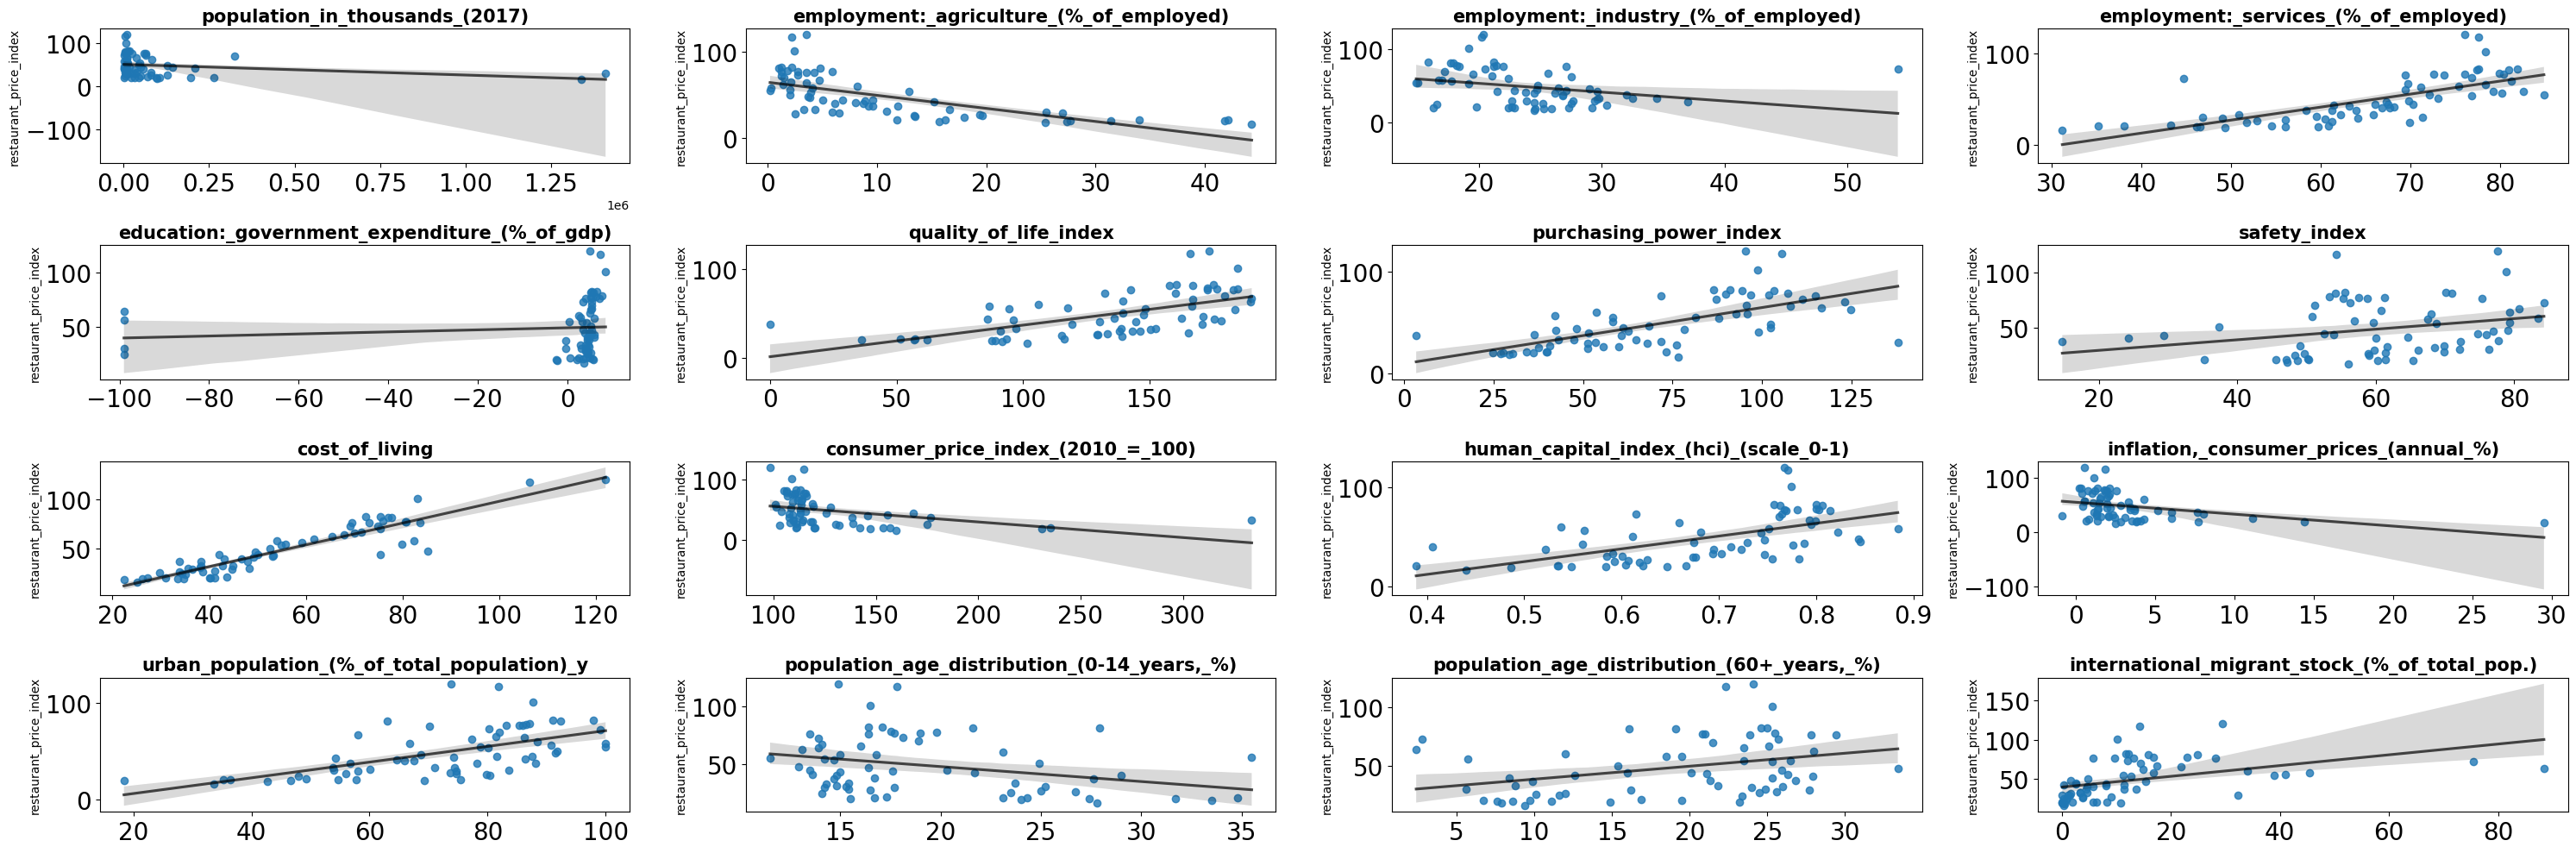

In [ ]:
# sacamos los regplot para las numéricas
fig, axes = plt.subplots(4, 4, figsize = (30, 10))
axes = axes.flat
predictoras = predictoras.columns

for i, col in enumerate(predictoras): 
        sns.regplot(data = df, x = col, y = 'restaurant_price_index', line_kws = {"color": "black", "alpha": 0.7 }, ax = axes[i])
        axes[i].set_title(col, fontsize = 15, fontweight = "bold")
        axes[i].tick_params(labelsize = 20)
        axes[i].set_xlabel("")

fig.tight_layout();

Aunque en la gráficas no se ve tan claro podemos concluir que efectivamente tan solo son homocedásticos los datos de las columnas 'cost_of_living' y 'consumer_price_index_(2010_=_100)'.

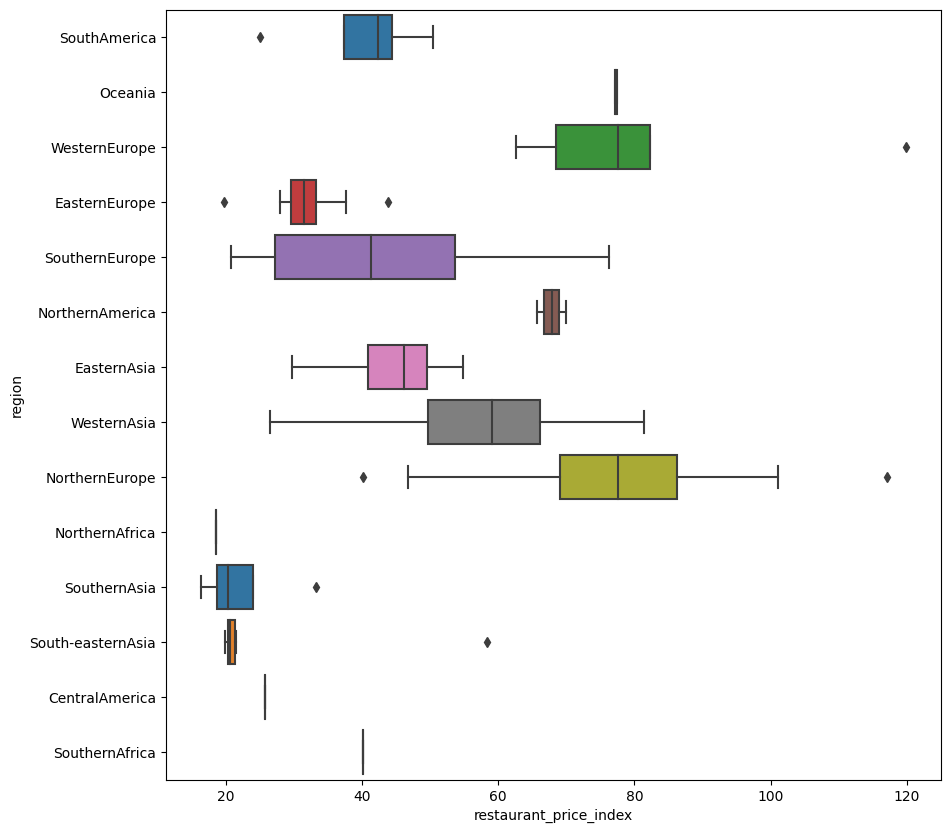

In [33]:
# para la columna categóricas utilizamos boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(y= 'region', x= 'restaurant_price_index', data = df, palette = 'tab10');

En la gráfica no parece que la columna 'region' sea homocedástica, por lo que el resultado del test de Levene puede deberse a que no se cumplen las otras asunciones